# Importing Libraries & Data

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline

In [52]:
train = pd.read_csv('titanic_train.csv')
train.head(5)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

# Exploratory Data Analysis

## Checking for null data values

<AxesSubplot:>

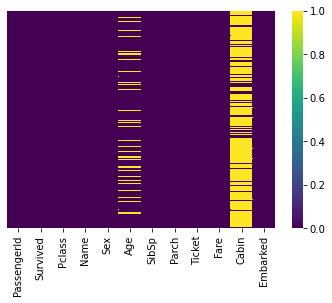

In [53]:
#Creating a heatmap of the boolean values. 
sns.heatmap(train.isnull(), yticklabels=False, cmap='viridis')

# Yellow Dash - Missing Information , 20% of the 'AGE' data missing.
# 1.0 - TRUE, 0.0 - FALSE

<AxesSubplot:xlabel='Survived', ylabel='count'>

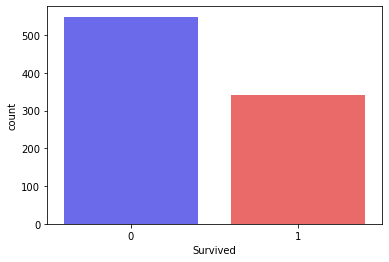

In [54]:
sns.countplot(x ='Survived' ,data=train, palette='seismic')

# 0 represents 'not survived' & 1 represents 'survived'
# More people died [550 approx] than survived[350 approx.]

<AxesSubplot:xlabel='Survived', ylabel='count'>

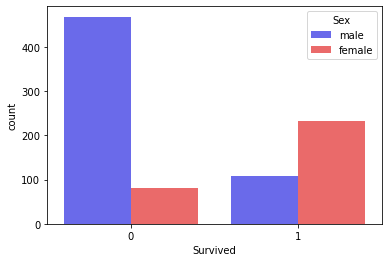

In [55]:
sns.countplot(x ='Survived', hue='Sex' ,data=train, palette='seismic') # Survival Rates by gender

# 1. More males died than females. 
# 2. Female survivors are twice the count of the male survivors

<AxesSubplot:xlabel='Survived', ylabel='count'>

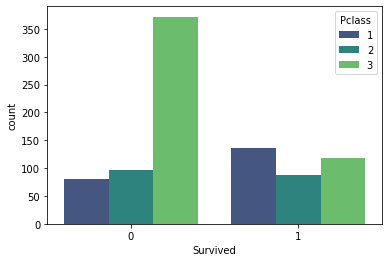

In [56]:
sns.countplot(x ='Survived', hue='Pclass' ,data=train, palette='viridis')

# 1. People who did not survive were overwhelmingly from CLASS 3 [Cheap Class]

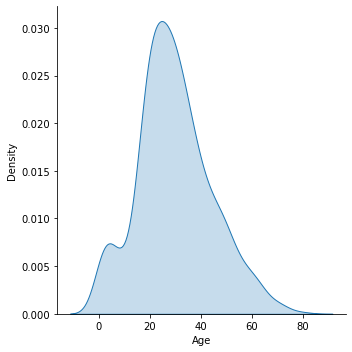

In [57]:
sns.displot(train['Age'].dropna(), kind='kde', fill=True)

#1. Bimodal Distribution
#2. Quite a few passengers between ages 0-10 -> More children
#3. Older the age, lesser the percentage of people on board

<AxesSubplot:ylabel='Frequency'>

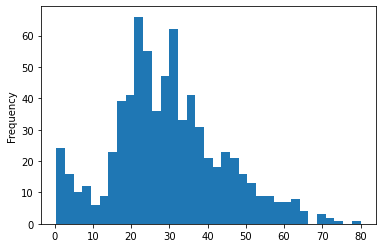

In [58]:
train['Age'].plot.hist(bins=35)
#Same ideas as from the KDE plot

In [59]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:xlabel='SibSp', ylabel='count'>

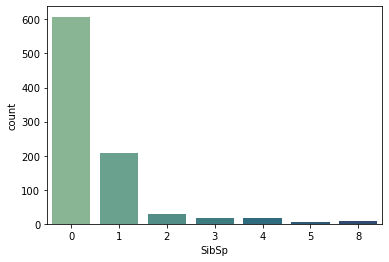

In [60]:
sns.countplot(x='SibSp', data=train, palette='crest')

#1. Most people on board did not have a child / children or a spouse - LOTS OF SINGLE PEOPLE - men in class 3 approx
#2. Second most option is '1' which is most likely to be spouse

<AxesSubplot:xlabel='Fare', ylabel='Count'>

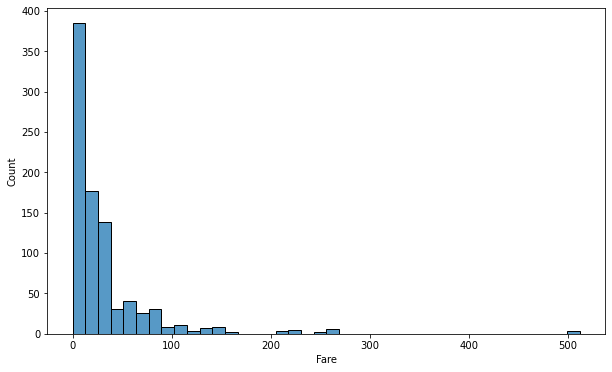

In [61]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(x='Fare',data=train, ax=ax, bins=40)

#1. High amount of tickets were purchased between 0,30/40 -- CHEAPER 3rd Class tickets

# Filling Missing Values - AGE

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

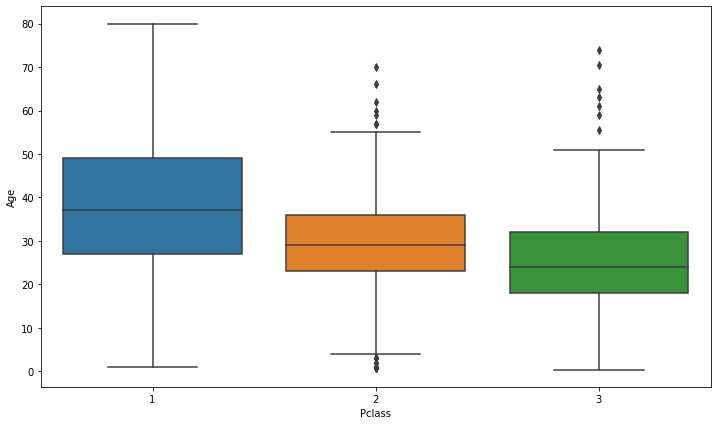

In [62]:
# 20% of the age data is missing. One way to fill the data is to fill it with the avg.mean. But that may / may not be correct, hence another approach is to take a look at all the different PassengerClasses and check the avg age of the present 3 PClasses. FOOKIN AMAZING!
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=train)

# From the data we can see that wealthier passengers from classes 1,2 tend to be older approx[25 - 50] compared to the passengers in class 3 whose ages tend to be 20-35 ish

In [63]:
#Getting the average ages for every Passenger Class
pclass = [1,2,3]
for i in pclass:
    avg_age = train[train['Pclass'] == i]['Age'].mean()
    print(f'Avg age of passengers in class {i} is {np.floor(avg_age)}')


Avg age of passengers in class 1 is 38.0
Avg age of passengers in class 2 is 29.0
Avg age of passengers in class 3 is 25.0


In [64]:
#Imputing the age
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 29
        else:
            return 25
    else:
        return Age


In [65]:
train['Age'] = train[['Age','Pclass']].apply(impute_age, axis=1)

<AxesSubplot:>

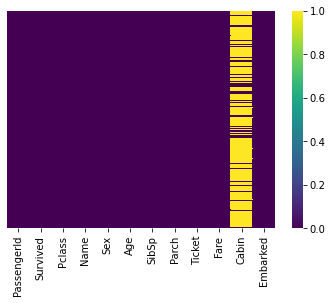

In [66]:
sns.heatmap(train.isnull(), yticklabels=False, cmap='viridis')

# No missing information for the 'AGE' column
# Nothing can be done with the cabin column since there are a lot of missing values

In [67]:
train.drop('Cabin', axis=1, inplace=True)
train.head(3)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S

<AxesSubplot:>

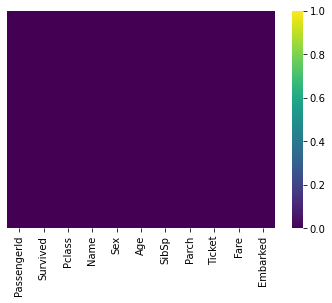

In [68]:
sns.heatmap(train.isnull(), yticklabels=False, cmap='viridis')

# Cabin column is no longer present.

In [69]:
train.dropna(inplace=True)

# Removes all the remaining missing values

<AxesSubplot:>

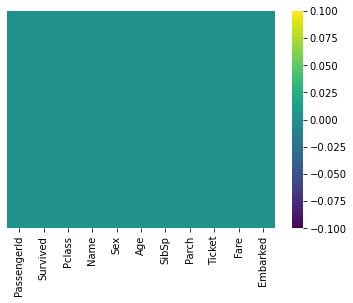

In [70]:
sns.heatmap(train.isnull(), yticklabels=False, cmap='viridis')

# No more missing values. The heatmap represents the value 0.0.

# Creating Dummy Variables

In [71]:
#Converting categorical variables into dummy/indicator variables
pd.get_dummies(train['Sex'])

#This will lead to Multi-colinearlity since one column can easily be used to predict the value of the other col.
#Bunch of columns will be a perfect predictor of another column

female  male
0         0     1
1         1     0
2         1     0
3         1     0
4         0     1
..      ...   ...
886       0     1
887       1     0
888       1     0
889       0     1
890       0     1

[889 rows x 2 columns]

In [72]:
#Solving Multi-colinearlity issue by dropping the first col.
sex = pd.get_dummies(train['Sex'], drop_first=True)
embark = pd.get_dummies(train['Embarked'], drop_first=True)


In [73]:
#Adding the newly made features
train = pd.concat([train, sex, embark], axis=1)
train.head(3)

# Embarked ENCODED INTO Q,S
# Sex ENCODED INTO male

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Embarked  male  Q  S  
0      0         A/5 21171   7.2500        S     1  0  1  
1      0          PC 17599  71.2833        C     0  0  0  
2      0  STON/O2. 3101282   7.9250        S     0  0  1

In [74]:
# Deleting features that are not needed / useful
train.drop(['Sex','Embarked','Name','Ticket'], axis=1, inplace=True)

In [75]:
# Passenger ID is also not useful since its an index and nothing more.
train.drop(['PassengerId'], axis=1, inplace= True)

In [76]:
#All the data is numerical. 
train.head()

Survived  Pclass   Age  SibSp  Parch     Fare  male  Q  S
0         0       3  22.0      1      0   7.2500     1  0  1
1         1       1  38.0      1      0  71.2833     0  0  0
2         1       3  26.0      0      0   7.9250     0  0  1
3         1       1  35.0      1      0  53.1000     0  0  1
4         0       3  35.0      0      0   8.0500     1  0  1

# Creating the Logistic Regression Model

In [77]:
X = train.drop('Survived',axis=1)
y = train['Survived']

In [78]:
X

Pclass   Age  SibSp  Parch     Fare  male  Q  S
0         3  22.0      1      0   7.2500     1  0  1
1         1  38.0      1      0  71.2833     0  0  0
2         3  26.0      0      0   7.9250     0  0  1
3         1  35.0      1      0  53.1000     0  0  1
4         3  35.0      0      0   8.0500     1  0  1
..      ...   ...    ...    ...      ...   ... .. ..
886       2  27.0      0      0  13.0000     1  0  1
887       1  19.0      0      0  30.0000     0  0  1
888       3  25.0      1      2  23.4500     0  0  1
889       1  26.0      0      0  30.0000     1  0  0
890       3  32.0      0      0   7.7500     1  1  0

[889 rows x 8 columns]

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [81]:
from sklearn.linear_model import LogisticRegression

In [82]:
model = LogisticRegression(max_iter=1000)

In [83]:
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [84]:
predictions = model.predict(X_test)

# Evaluation Metrics

In [85]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [86]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87       163
           1       0.85      0.70      0.77       104

    accuracy                           0.84       267
   macro avg       0.84      0.81      0.82       267
weighted avg       0.84      0.84      0.83       267



In [87]:
cfmatrix = confusion_matrix(y_test, predictions)
cfmatrix.shape

(2, 2)

In [88]:
cfmatrix_df = pd.DataFrame(data=cfmatrix, columns=['Positive','Negative'], index= ['Positive','Negative'])
cfmatrix_df

Positive  Negative
Positive       150        13
Negative        31        73

# Making a NEW PREDICTION

In [89]:
X_new_pred = np.array([[3,20,1,0,7.7750,1,0,1]]) # New Observation
y_new_pred = model.predict(X_new_pred)

In [90]:
# 0 - Passenger Die / 1 - Passenger Survived.
if y_new_pred == [0]:
    print("Passenger Died.")
else:
    print("Passenger Survived.")

Passenger Died.
